<a href="https://colab.research.google.com/github/Andrea-24744/Simulaci-n-1/blob/main/M%C3%A9todo_Box_Muller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método Box-Muller
*Santelices Medina Andrea*

<p style="text-align: justify;">El método de Box-Müller permite transformar dos variables aleatorias independientes con distribución uniforme en el intervalo $(0, 1)$, en dos variables independientes con distribución normal estándar $N(0,1)$.</p>


<p style="text-align: justify;">La base del método es que la densidad conjunta de dos variables aleatorias normales estándar independientes $X_1$ y $X_2$ es:</p>

$$
f(x_1, x_2) = \frac{1}{2\pi} e^{-\frac{1}{2}(x_1^2 + x_2^2)}
$$

<p style="text-align: justify;">Esta función de densidad es radialmente simétrica: depende únicamente de la distancia al origen, es decir, del valor $r^2 = x_1^2 + x_2^2$. Esto sugiere transformación de coordenadas cartesianas a polares</p>


$$
R^2 = x_1^2 + x_2^2, \quad \theta = \arctan\left(\frac{x_2}{x_1}\right)
$$

Al hacer el cambio de variables, se observa que:

- $R^2$ sigue una distribución $\chi^2(2)$, que es equivalente a una distribución exponencial con parámetro 1 $(R^2 \sim \quad \text{Exponencial(1)})$. Por lo tanto:

$$
R = \sqrt{-2 \ln U_1}
$$

- $\theta$ está uniformemente distribuido en el intervalo $[0, 2\pi)$, por lo que se puede tomar:

$$
\theta = 2\pi U_2
$$
donde $U_1$ y $U_2$ son variables independientes con distribución uniforme en $(0,1)$.


Aplicando estas transformaciones, se obtienen dos variables normales estándar independientes:

$$
X_1 = \sqrt{-2 \ln U_1} \cdot \cos(2\pi U_2)
$$

$$
X_2 = \sqrt{-2 \ln U_1} \cdot \sin(2\pi U_2)
$$



<p style="text-align: justify;">Este procedimiento genera dos variables $X_1$ y $X_2$ que son independientes y tienen distribución normal estándar $N(0,1)$. La transformación garantiza que se preserva la independencia y que la distribución conjunta de las variables transformadas es la esperada:</p>


$$
f(X_1, X_2) = f(X_1) f(X_2) = \frac{1}{\sqrt{2\pi}} e^{-\frac{X_1^2}{2}} \cdot \frac{1}{\sqrt{2\pi}} e^{-\frac{X_2^2}{2}}
$$

<p style="text-align: justify;"> Box y Müller (1958), este método resulta computacionalmente conveniente, ya que solo requiere operaciones básicas (logaritmos, raíces cuadradas y funciones trigonométricas).</p>



###Algoritmo de Box-Müller (1958)###

1. Generar dos variables independientes $U_1, U_2 \sim \mathcal{U}(0, 1) $.
2. Calcular:
    $$
    R = \sqrt{-2 \ln U_1}, \qquad \theta = 2\pi U_2
    $$
    
3.  Determinar:
    $$
    X_1 = R \cos \theta, \qquad X_2 = R \sin \theta$$
    
    $$ \text{donde} \quad  X_1, X_2 \sim \mathcal{N}(0, 1) \quad \text{son independientes.}$$

Programemos entonces nuestro algoritmo:

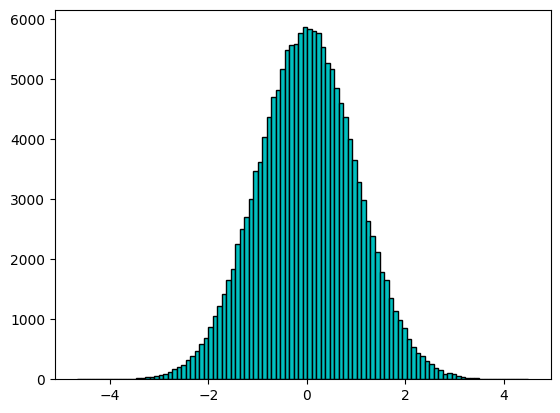

In [84]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import math


def Box_M(n):
  l = []
  for _ in range(n):
      u_1 = rd.random()  # Generamos 2 números aleatorios
      u_2 = rd.random()
      R = math.sqrt(-2*math.log(u_1)) # Determinamos nuestra función R
      T = 2*math.pi*u_2               # Determinamos nuestra función Teta
      X_1 = R*math.cos(T)               # Definimos nuestra primer variable independiente
      X_2 = R*math.sin(T)               # Definimos nuestra segunda variable independiente
      l.append(X_1)                     # Guardamos ambas en la lista
      l.append(X_2)
  return l

# Generamos histograma
g = Box_M(80000)
plt.hist(g, bins = 100, color ="c",edgecolor ="black")
plt.show()

In [85]:
# Determinamos su media, varianza y desviación estandar de la muestra
print("La media es: ", np.mean(g))
print("La varianza es: ", np.var(g))
print("La desviacion estandar es: ", np.std(g))

La media es:  0.00019120525996427914
La varianza es:  1.0007686219288285
La desviacion estandar es:  1.0003842371453224


In [86]:
# La distribución normal estandar (distribución Z) tiene los valores teóricos de:
print("La media es: 0 ")
print("La varianza es: 1 ")
print("La desviacion estandar es: 1 ")

La media es: 0 
La varianza es: 1 
La desviacion estandar es: 1 


In [87]:
# Determinemos el error observado en cada caso
print("El error de la media es: ", abs(np.mean(g)-0))
print("El error de la varianza es: ", abs(np.var(g)-1))
print("El error de la desviacion estandar es: ", abs(np.std(g)-1))

El error de la media es:  0.00019120525996427914
El error de la varianza es:  0.000768621928828539
El error de la desviacion estandar es:  0.00038423714532243025
